In [1]:
import scipy.stats as sps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Работа с библиотекой `scipy.stats`.

<b>Общий принцип:</b>

Пусть $X$ — класс, реализующий некоторое распределение. Конкретное распределение с параметрами `params` можно получить как **`X(params)`**. У него доступны следующие методы:


* `X(params).rvs(size=N)` — генерация выборки размера $N$ (<b>R</b>andom <b>V</b>ariate<b>S</b>). Возвращает `numpy.array`;
* `X(params).cdf(x)` — значение функции распределения в точке $x$ (<b>C</b>umulative <b>D</b>istribution <b>F</b>unction);
* `X(params).logcdf(x)` — значение логарифма функции распределения в точке $x$;
* `X(params).ppf(q)` — $q$-квантиль (<b>P</b>ercent <b>P</b>oint <b>F</b>unction);
* `X(params).mean()` — математическое ожидание;
* `X(params).median()` — медиана ($1/2$-квантиль);
* `X(params).var()` — дисперсия (<b>Var</b>iance);
* `X(params).std()` — стандартное отклонение = корень из дисперсии (<b>St</b>andard <b>D</b>eviation).

Кроме того для непрерывных распределений определены функции
* `X(params).pdf(x)` — значение плотности в точке $x$ (<b>P</b>robability <b>D</b>ensity <b>F</b>unction);
* `X(params).logpdf(x)` — значение логарифма плотности в точке $x$.

А для дискретных
* `X(params).pmf(k)` — значение дискретной плотности в точке $k$ (<b>P</b>robability <b>M</b>ass <b>F</b>unction);
* `X(params).logpdf(k)` — значение логарифма дискретной плотности в точке $k$.

Все перечисленные выше методы применимы как к конкретному распределению `X(params)`, так и к самому классу `X`. Во втором случае параметры передаются в сам метод. Например, вызов `X.rvs(size=N, params)` эквивалентен `X(params).rvs(size=N)`. При работе с распределениями и случайными величинами рекомендуем использовать первый способ, посколько он больше согласуется с математическим синтаксисом теории вероятностей.

Параметры могут быть следующими:
* `loc` — параметр сдвига;
* `scale` — параметр масштаба;
* и другие параметры (например, $n$ и $p$ для биномиального).

---

Для примера сгенерируем выборку размера $N = 200$ из распределения $\mathcal{N}(1, 9)$ и посчитаем некоторые статистики.
В терминах выше описанных функций у нас $X$ = `sps.norm`, а `params` = (`loc=1, scale=3`).

*Примечание.* Выборка — набор независимых одинаково распределенных случайных величин. Часто в разговорной речи выборку отождествляют с ее *реализацией* — значения случайных величин из выборки при "выпавшем" элементарном исходе.

In [2]:
sample = sps.norm(loc=1, scale=3).rvs(size=200)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [-2.14201156  3.02015593  3.3712464   1.13011726  0.02061974  2.99258845
 -0.52577589  1.73461156 10.49416042  0.12428103]
Выборочное среденее: 1.078
Выборочная дисперсия: 8.752


Вероятностные характеристики

In [3]:
print('Плотность:\t\t', sps.norm(loc=1, scale=3).pdf([-1, 0, 1, 2, 3]))
print('Функция распределения:\t', sps.norm(loc=1, scale=3).cdf([-1, 0, 1, 2, 3]))

Плотность:		 [0.10648267 0.12579441 0.13298076 0.12579441 0.10648267]
Функция распределения:	 [0.25249254 0.36944134 0.5        0.63055866 0.74750746]


$p$-квантиль распределения с функцией распределения $F$ — это число $min\{x: F(x) \geqslant p\}$.

In [4]:
print('Квантили:', sps.norm(loc=1, scale=3).ppf([0.05, 0.1, 0.5, 0.9, 0.95]))

Квантили: [-3.93456088 -2.8446547   1.          4.8446547   5.93456088]


Cгенерируем выборку размера $N = 200$ из распределения $Bin(10, 0.6)$ и посчитаем некоторые статистики.
В терминах выше описанных функций у нас $X$ = `sps.binom`, а `params` = (`n=10, p=0.6`).

In [5]:
sample = sps.binom(n=10, p=0.6).rvs(size=200)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [9 5 4 7 7 6 9 4 5 7]
Выборочное среденее: 6.105
Выборочная дисперсия: 2.874


In [6]:
print('Дискретная плотность:\t', sps.binom(n=10, p=0.6).pmf([-1, 0, 5, 5.5, 10]))
print('Функция распределения:\t', sps.binom(n=10, p=0.6).cdf([-1, 0, 5, 5.5, 10]))

Дискретная плотность:	 [0.00000000e+00 1.04857600e-04 2.00658125e-01 2.34848964e-01
 6.04661760e-03]
Функция распределения:	 [0.00000000e+00 1.04857600e-04 3.66896742e-01 3.66896742e-01
 1.00000000e+00]


In [7]:
print('Квантили:', sps.binom(n=10, p=0.6).ppf([0.05, 0.1, 0.5, 0.9, 0.95]))

Квантили: [3. 4. 6. 8. 8.]


Бывает так, что <b>надо сгенерировать выборку из распределения, которого нет в `scipy.stats`</b>.
Для этого надо создать класс, который будет наследоваться от класса `rv_continuous` для непрерывных случайных величин и от класса `rv_discrete` для дискретных случайных величин.
<a  target="_blank" href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous">Пример из документации.</a>

Для примера сгенерируем выборку из распределения с плотностью $f(x) = \frac{4}{15} x^3 I\{x \in [1, 2] = [a, b]\}$.

In [8]:
class cubic_gen(sps.rv_continuous):
    def _pdf(self, x):
        return 4 * x ** 3 / 15
cubic = cubic_gen(a=1, b=2, name='cubic')

sample = cubic.rvs(size=200)

print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [1.89979152 1.51110556 1.93532835 1.84935384 1.90745039 1.61557463
 1.44890831 1.34432555 1.31361777 1.76004114]
Выборочное среденее: 1.674
Выборочная дисперсия: 0.064


Если дискретная случайная величина может принимать небольшое число значений, то можно не создавать новый класс, как показано выше, а явно указать эти значения и из вероятности.

In [9]:
some_distribution = sps.rv_discrete(
    name='some_distribution', 
    values=([1, 2, 3], [0.6, 0.1, 0.3])  # значения и вероятности
)

sample = some_distribution.rvs(size=200)

print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Частота значений по выборке:', 
      (sample == 1).mean(), (sample == 2).mean(), (sample == 3).mean())

Первые 10 значений выборки:
 [3 1 3 2 3 3 3 3 3 3]
Выборочное среденее: 1.735
Частота значений по выборке: 0.565 0.135 0.3


**Задача 1.** Сгенерировать выборку размера 10 из распределения $\mathcal{N}(a, s)$. Для данной выборки подсчитайте выборочные зарактеристики. Постройте гистограмму, эмпирическую функцию распределения.



Первые 10 значений выборки:
 [ 1.94113082  6.31043417  3.52514752  0.61276707  0.87320255 -2.36203372
  2.76903549  1.84563835  3.07075172  0.45308135]
Выборочное среднее: 1.904
Выборочная дисперсия: 4.719
Квантили: [-5.57941451 -4.12620626  1.          6.12620626  7.57941451]


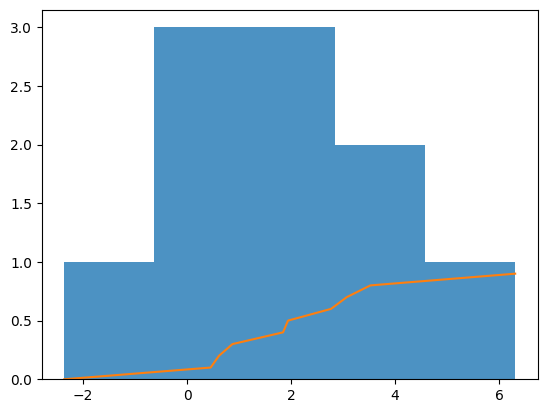

In [2]:
loc = 1 #Коэффициент сдвига
scale = 4 #Коэффициент масштаба
sample = sps.norm(loc=loc, scale=scale).rvs(size=10) #Нормальное распределение
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среднее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())
print('Квантили:', sps.norm(loc=loc, scale=scale).ppf([0.05, 0.1, 0.5, 0.9, 0.95]))
hist = plt.hist(sample, bins='auto', alpha=0.8)

x = np.sort(sample)
y = np.arange(len(x))/float(len(x))
plt.plot(x, y)
plt.show()

**Задача 2.** Скачайте <a href="https://www.kaggle.com/spscientist/students-performance-in-exams
">датасет</a> с данными о результатах учащихся на экзаменах.

Данный датасет состоит из таблицы баллов учащихся на экзаменах по математике, чтению и письму, а также дополнительной информации о студентах. Каждая строка соответствует одному учащемуся, каждый столбец соответствует одному признаку. В столбцах math score, reading score и writing score записаны баллы за экзамены.

Для исследования возьмите столбцы 'math score', 'reading score', 'writing score'.

----

Чтобы скачать данные, зарегистрируйтесь на сайте, после нажмите download на странице датасета и распакуйте скачанный архив. Вы получите файл формата `csv`.

Если вы работаете в Google Colab, можно загрузить полученный файл в разделе "Файлы" (значок папки) на левой панели.

In [23]:
# эта функция читает данные, в кавычках укажите путь к файлу на вашем компьютере или в Colab
df = pd.read_csv("./StudentsPerformance.csv")

In [24]:
#Посмотрите на первые строки этой таблицы.
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


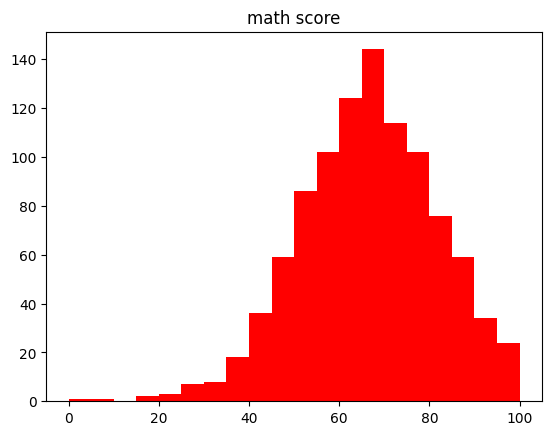

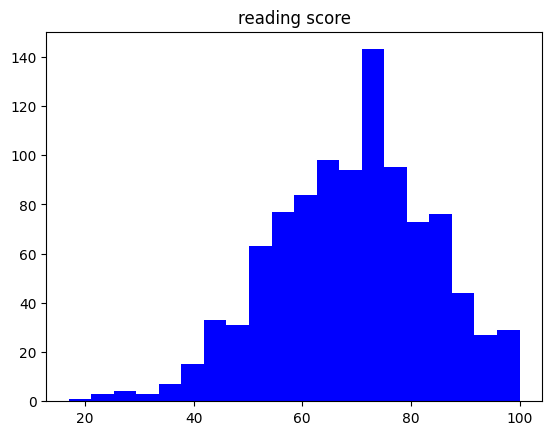

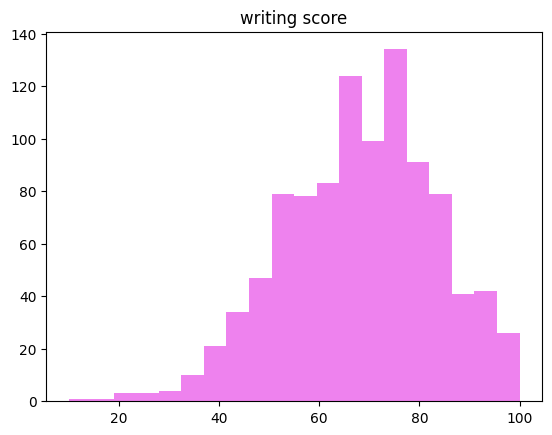

In [70]:
#Выберите несколько (3-6) столбцов для анализа значений в них.
# укажите столбцы данных 
# Пример: columns = ['math score', ...]
columns = ['math score', 'reading score', 'writing score']

#Гистограммы столбцов
df_chosen_columns = df[columns]
plt.hist(df_chosen_columns['math score'], bins=20, color='red', label='math score')
plt.title('math score')
plt.show()
plt.hist(df_chosen_columns['reading score'], bins=20, color='blue', label='reading score')
plt.title('reading score')
plt.show()
plt.hist(df_chosen_columns['writing score'], bins=20, color='violet')
plt.title('writing score')
plt.show()
#Одномерный массив значений одного признака (например, 'math score') можно получить так:
#df_chosen_columns['math score']

In [72]:
#Для определения выбросов используется межквантильный диапазон (IQR), равный разнице между 75-м и 25-м квантилем. Выбросы в этом случае определяются как 1,5 кратное IQR, которое ниже 25-го квантиля или выше 75-го квантиля.

ms_q25, ms_q75 = df_chosen_columns['math score'].quantile(0.25), df_chosen_columns['math score'].quantile(0.75)
ms_iqr = ms_q75 - ms_q25
rs_q25, rs_q75 = df_chosen_columns['reading score'].quantile(0.25), df_chosen_columns['reading score'].quantile(0.75)
rs_iqr = rs_q75 - rs_q25
ws_q25, ws_q75 = df_chosen_columns['writing score'].quantile(0.25), df_chosen_columns['writing score'].quantile(0.75)
ws_iqr = ws_q75 - ws_q25

#Определение пределов для графиков
ranges_without_outliers = {
    'math score' : (ms_q25 - (1.5 * ms_iqr), ms_q75 + (1.5 * ms_iqr)),
    'reading score' : (rs_q25 - (1.5 * rs_iqr), rs_q75 + (1.5 * rs_iqr)),
    'writing score' : (ws_q25 - (1.5 * ws_iqr), ws_q75 + (1.5 * ws_iqr))
}

#### Гистограммы

Для каждого из выбранных признаков нарисуйте гистограмму распределения. Для этого воспользуйтесь функцией `matplotlib.pyplot.hist`.

Предположите, для каких признаков возможно наличие выбросов. Эту проблему можно решить с помощью параметра range, который определяет, в каких границах строится гистограмма.

In [ ]:
plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4));

В словаре ranges_without_outliers укажите, в каких пределах, по вашему мнению, стоит нарисовать гистограмму распределения для каждого признака.

In [43]:
ranges_without_outliers_example = {
    'column1' : (-1, 5),
    'column2' : (0, 3)
}

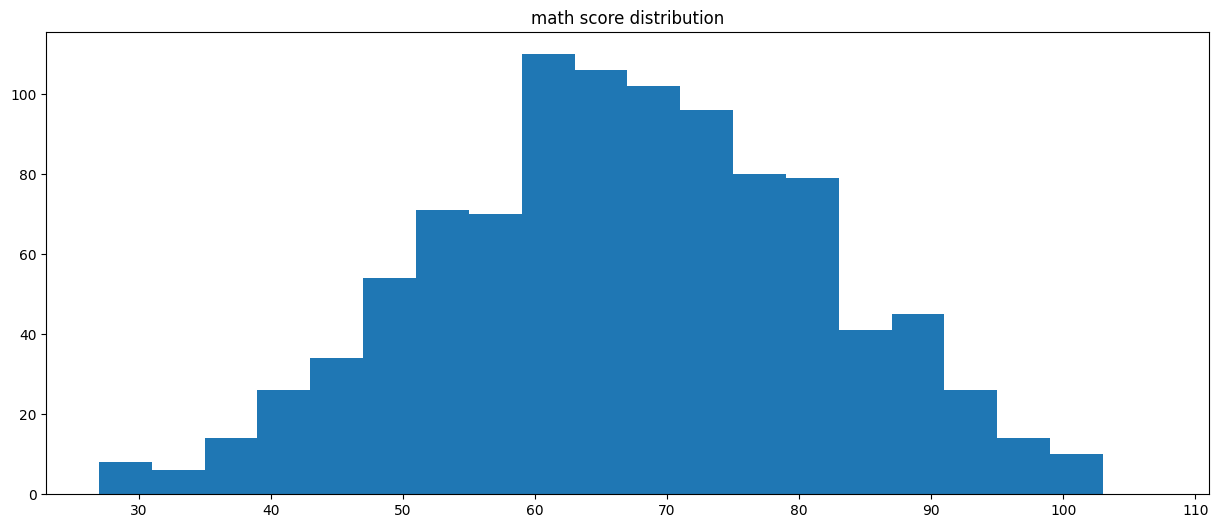

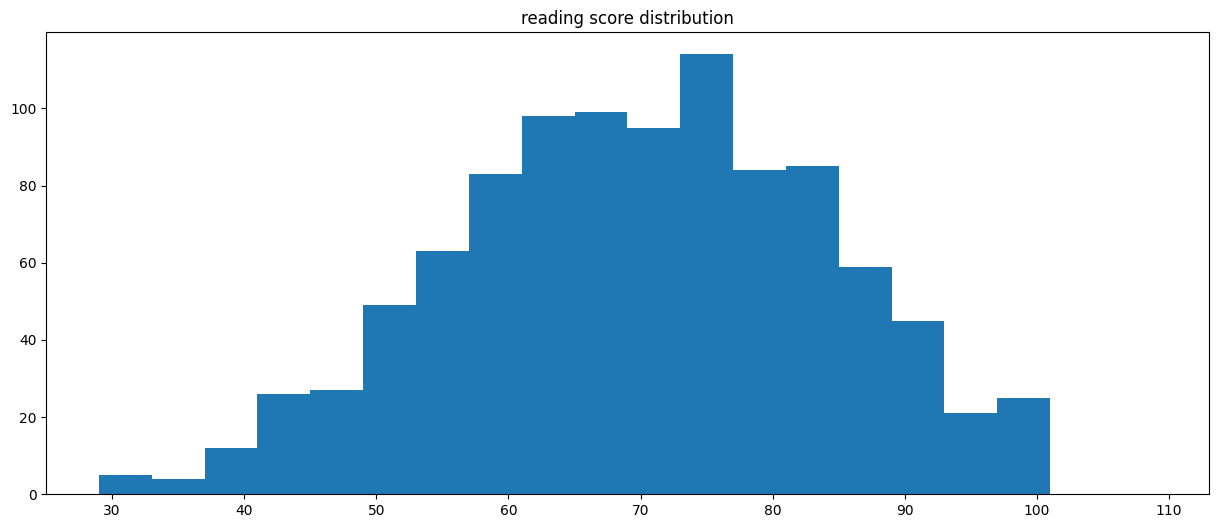

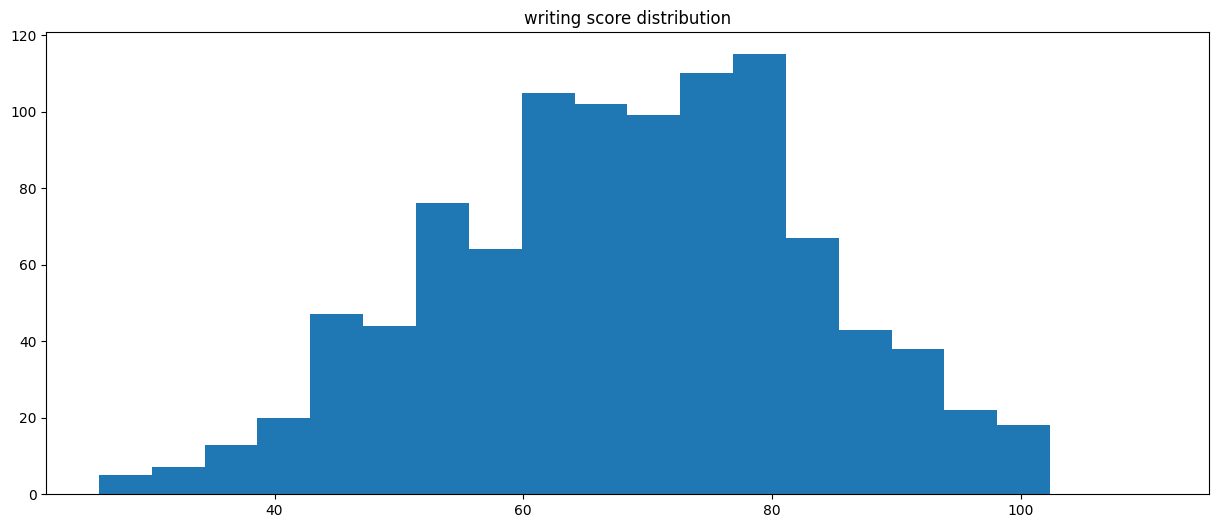

In [73]:
#Аналогично определите интервалы для исследуемых признаков
for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(15, 6))
    plt.hist(df_chosen_columns[column], range=column_range, bins=20)
    plt.title(column + ' distribution')

Сделайте выводы

Изменилась ли форма распределений, стали ли графики информативнее?

Форма распределений изменилась. Получившиеся графики позволяют уделить больше внимания основным результатам, но графики стали менее информативными из-за того, что отображается лишь часть данных в установленных границах.